In [1]:
# import required files
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

import pandas as pd
import numpy as np
import datetime 
import missingno as mn

In [2]:
# let's read excel file - sheet by sheet in dataframe

df_demo = pd.read_excel('Data/Customer_Data.xlsx',sheet_name ='CustomerDemographic', header = 1)
df_custadd = pd.read_excel('Data/Customer_Data.xlsx',sheet_name = 'CustomerAddress', header = 1)
df_transaction = pd.read_excel('Data/Customer_Data.xlsx',sheet_name = 'Transactions', header = 1)

In [3]:
# Customer Demographic file - first three rows

df_demo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


In [4]:
# let's see, how big is the data set

df_demo.shape

(4000, 13)

# Cleaning of the data - Customer Demographic

In [5]:
# checking the unique values in gender column

df_demo['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

**we can see there is data inconsistency with the initials and full category name of the gender, so we clean it and make it in calculative format**

In [6]:
df_demo['gender'].replace(['Female', 'Femal'], 'F', inplace=True)
df_demo['gender'].replace('Male', 'M', inplace=True)

In [7]:
df_demo['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [8]:
# to see the column names in the dataframe

df_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [9]:
# checking the values in the column default

df_demo['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

**We'll remove default coulmn as it is irrelevent and has no valuable data**

In [10]:
df_demo = df_demo.drop(['default'], axis = 1)

In [11]:
# checking the values in deceased_indicator and tenure column, if it is relevant for analysis

df_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [12]:
df_demo['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [13]:
# lets drop these two columns

df_demo = df_demo.drop(['deceased_indicator','tenure'], axis = 1)

In [14]:
df_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car'],
      dtype='object')

In [15]:
# Now lets check the size of the dataset

df_demo.shape

(4000, 10)

### To check if all the columns has value or some data missing we'll check each column for that

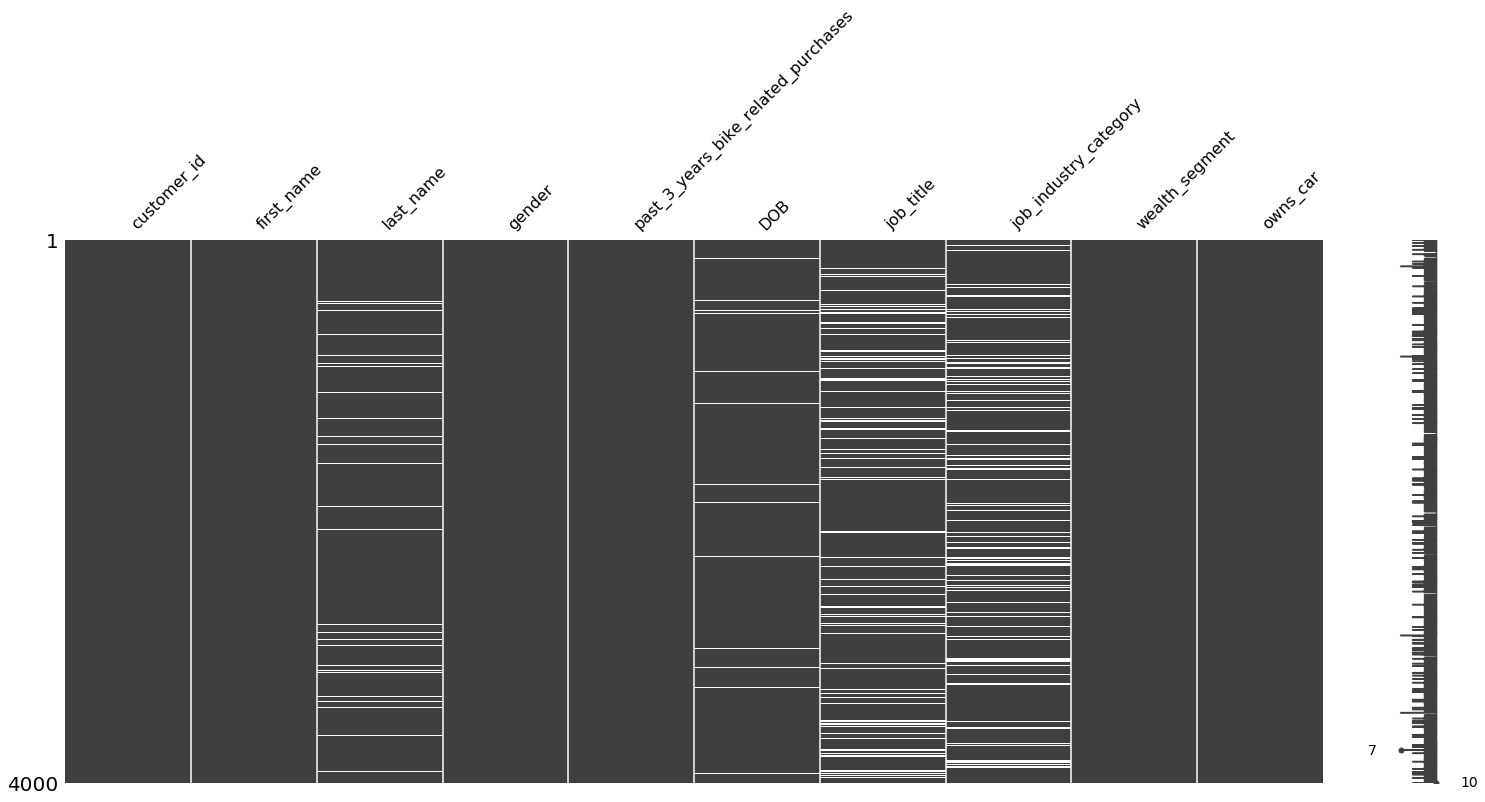

In [16]:
mn.matrix(df_demo)

In [17]:
df_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
owns_car                                 0
dtype: int64

In [18]:
# missing job title and job industory categories filled by others 

df_demo['job_industry_category'].fillna('others',inplace=True)
df_demo['job_title'].fillna('others',inplace=True)

In [19]:
df_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                    0
wealth_segment                           0
owns_car                                 0
dtype: int64

In [20]:
# merging first name and last name as new 'name' column

df_demo['name']=df_demo['first_name']+' '+df_demo['last_name']
df_demo['name']

0           Laraine Medendorp
1                 Eli Bockman
2                Arlin Dearle
3                         NaN
4       Sheila-kathryn Calton
                ...          
3995         Rosalia Halgarth
3996            Blanch Nisuis
3997           Sarene Woolley
3998                      NaN
3999            Kippy Oldland
Name: name, Length: 4000, dtype: object

In [21]:
df_demo.drop(['first_name','last_name'],axis=1,inplace=True)
df_demo.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment', 'owns_car',
       'name'],
      dtype='object')

In [22]:
df_demo.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                    0
wealth_segment                           0
owns_car                                 0
name                                   125
dtype: int64

**Here we can see in the result that in DOB and name has missing data (showing the number of missing data) <br>
**we'll drop the rows, that has nan or none value or we can say no value in it

In [23]:
df_demo = df_demo.dropna()

In [24]:
df_demo.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
name                                   0
dtype: int64

In [25]:
df_demo.shape

(3792, 9)

### now we are calcluating the age here and adding a column age in the dataframe, after that we'll categorise age into 4 different groups by defining age_range

In [26]:
df_demo["age"] = df_demo["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


We'll drop the customers above 100 years from the table

In [27]:
age_index = df_demo[df_demo['age'] > 100 ].index
df_demo.drop(age_index , inplace=True)

In [28]:
df_demo['age_range'] = pd.cut(df_demo['age'], bins=10)
df_demo.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,name,age,age_range
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,Laraine Medendorp,68,"(61.6, 68.7]"
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,Eli Bockman,41,"(40.3, 47.4]"
2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,Arlin Dearle,67,"(61.6, 68.7]"
4,5,F,56,1977-05-13,Senior Editor,others,Affluent Customer,Yes,Sheila-kathryn Calton,44,"(40.3, 47.4]"
5,6,M,35,1966-09-16,others,Retail,High Net Worth,Yes,Curr Duckhouse,55,"(54.5, 61.6]"


**Now after having age of each customer, we don't need DOB, so we'll drop that column from the table**

In [29]:
df_demo.drop(['DOB'], axis = 1,inplace=True)
df_demo.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'job_title', 'job_industry_category', 'wealth_segment', 'owns_car',
       'name', 'age', 'age_range'],
      dtype='object')

**To check duplicay or any null value in the dataframe**

In [30]:
duplicate_data = df_demo.duplicated()
df_demo[duplicate_data].sum()

customer_id                            0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
owns_car                               0.0
name                                   0.0
age                                    0.0
age_range                              0.0
dtype: float64

In [31]:
# to check statistical describtion abput data

df_demo.describe()

,customer_id,past_3_years_bike_related_purchases,age
count,3791.000000,3791.000000,3791.000000
mean,1996.800844,48.980480,43.978370
std,1154.713898,28.759308,12.603913
min,1.000000,0.000000,19.000000
25%,1001.500000,24.000000,34.500000
50%,1995.000000,48.000000,44.000000
75%,2991.500000,73.000000,53.000000
max,4000.000000,99.000000,90.000000


In [32]:
df_demo.to_csv('Data/Customer_Demographic.csv')

# Cleaning data - Customer Address 

In [33]:
df_custadd.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


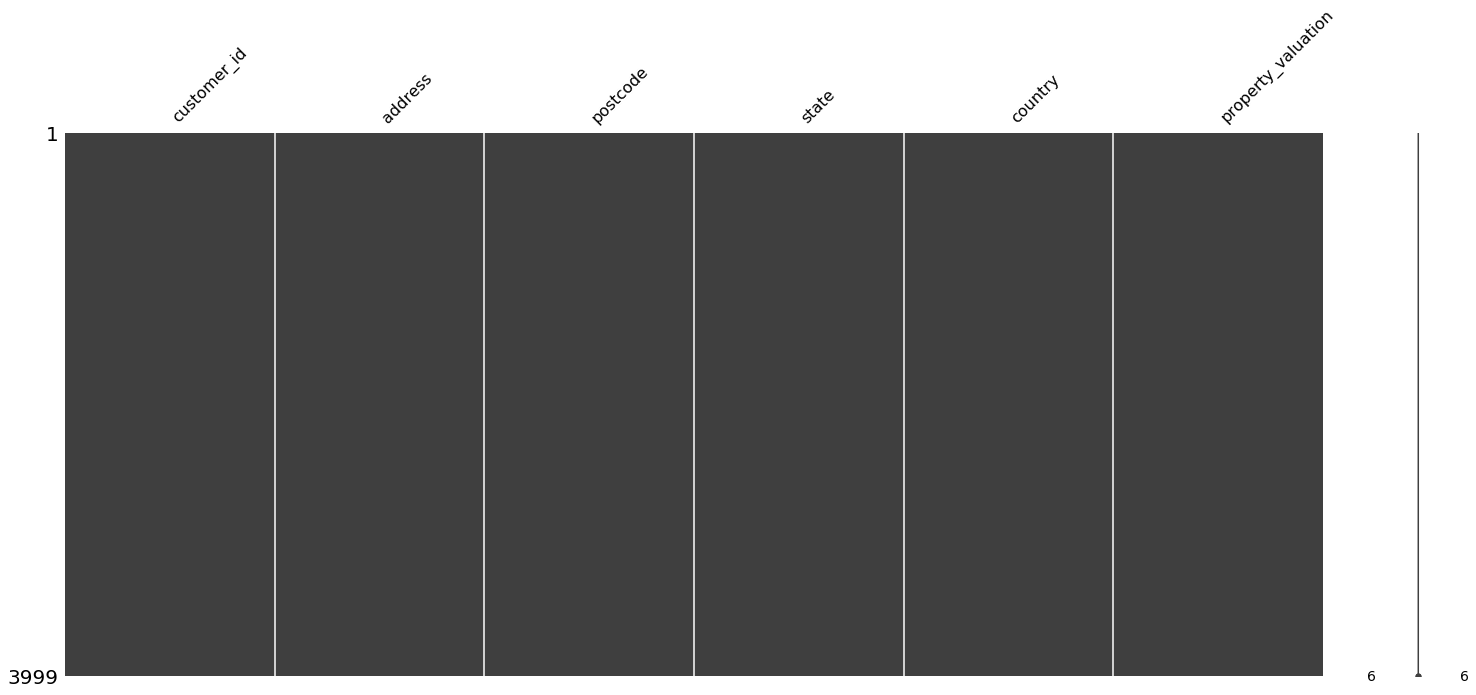

In [34]:
mn.matrix(df_custadd)

In [35]:
# checking the value in column country

df_custadd['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [36]:
df_custadd['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

**we can see there is only one country 'Australia' data is here, so we'll remove the column country as well as we don't need it**

In [37]:
df_custadd.drop(['country','property_valuation'],axis=1,inplace=True)
df_custadd.columns

Index(['customer_id', 'address', 'postcode', 'state'], dtype='object')

In [38]:
# Checking the value of the column state

df_custadd['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

**Here we can see that the states name that is mentioned above has incosistency, so we'll clean that in one type of readable format so the analyzing these data become easy**

In [39]:
df_custadd['state'].replace('New South Wales','NSW', inplace = True)
df_custadd['state'].replace('Victoria','VIC', inplace = True)

In [40]:
df_custadd['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [41]:
# changing data type of the column postcode

df_custadd['postcode']=df_custadd['postcode'].astype(str)

In [42]:
#getting postcode and state in one column to get langitude and latitude of each address
df_custadd['pcode_state'] = df_custadd['postcode']+','+df_custadd['state']

df_custadd.drop(['postcode'],axis=1,inplace=True)
df_custadd

,customer_id,address,state,pcode_state
0,1,060 Morning Avenue,NSW,"2016,NSW"
1,2,6 Meadow Vale Court,NSW,"2153,NSW"
2,4,0 Holy Cross Court,QLD,"4211,QLD"
3,5,17979 Del Mar Point,NSW,"2448,NSW"
4,6,9 Oakridge Court,VIC,"3216,VIC"
...,...,...,...,...
3994,3999,1482 Hauk Trail,VIC,"3064,VIC"
3995,4000,57042 Village Green Point,QLD,"4511,QLD"
3996,4001,87 Crescent Oaks Alley,NSW,"2756,NSW"
3997,4002,8194 Lien Street,QLD,"4032,QLD"


In [70]:
# function to get the latitude and longitude of the address

def latlong(add):
    geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
    location = geolocator.geocode(add)    
    return([add,location.latitude, location.longitude])

In [71]:
# to get unique address to get the result fast

add=set(df_custadd.pcode_state)

In [72]:
# calling function by passing the address in add set to get latitude longitude
lat=[]
for i in add:
    lat.append(latlong(i))

In [73]:
# creating a dataframe with the unqiue address codes

df_lat=pd.DataFrame(lat,columns=['pcode_state','latitude','longitude'])
df_lat

,pcode_state,latitude,longitude
0,"4512,QLD",-27.023560,152.878401
1,"3056,VIC",-37.768341,144.959636
2,"3428,VIC",-37.640668,144.801759
3,"4157,QLD",-27.545994,153.202654
4,"3011,VIC",-37.799711,144.895075
...,...,...,...
868,"2469,NSW",-28.937426,152.730944
869,"3155,VIC",-37.862430,145.260463
870,"3027,VIC",-37.855363,144.736119
871,"2070,NSW",-33.773672,151.171964


In [74]:
# merging the unique address dataframe with the main dataframe to get the codes for each row

df_custadd=df_custadd.merge(df_lat)
df_custadd

,customer_id,address,state,pcode_state,latitude,longitude
0,1,060 Morning Avenue,NSW,"2016,NSW",-33.893169,151.203515
1,1059,1149 Riverside Parkway,NSW,"2016,NSW",-33.893169,151.203515
2,2172,698 Lunder Point,NSW,"2016,NSW",-33.893169,151.203515
3,2380,4 Judy Park,NSW,"2016,NSW",-33.893169,151.203515
4,2768,9 Cascade Junction,NSW,"2016,NSW",-33.893169,151.203515
...,...,...,...,...,...,...
3994,3884,7 Beilfuss Center,NSW,"2550,NSW",-36.509923,149.842106
3995,3902,60 Towne Pass,NSW,"2877,NSW",-32.965725,146.839155
3996,3903,5 Rutledge Center,QLD,"4311,QLD",-27.416413,152.503835
3997,3922,0 Southridge Drive,QLD,"4311,QLD",-27.416413,152.503835


In [75]:
df_custadd.to_csv('Data/Customer_Address.csv')

In [76]:
#merging customer demographic and customer address file together

new_df = df_demo.merge(df_custadd, on = 'customer_id', how = 'inner')

In [77]:
new_df.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,name,age,age_range,address,state,pcode_state,latitude,longitude
0,1,F,93,Executive Secretary,Health,Mass Customer,Yes,Laraine Medendorp,68,"(61.6, 68.7]",060 Morning Avenue,NSW,"2016,NSW",-33.893169,151.203515
1,2,M,81,Administrative Officer,Financial Services,Mass Customer,Yes,Eli Bockman,41,"(40.3, 47.4]",6 Meadow Vale Court,NSW,"2153,NSW",-33.753524,150.998301
2,5,F,56,Senior Editor,others,Affluent Customer,Yes,Sheila-kathryn Calton,44,"(40.3, 47.4]",17979 Del Mar Point,NSW,"2448,NSW",-30.606009,153.001931


# Cleaning data- Transactions

In [78]:
df_transaction.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0


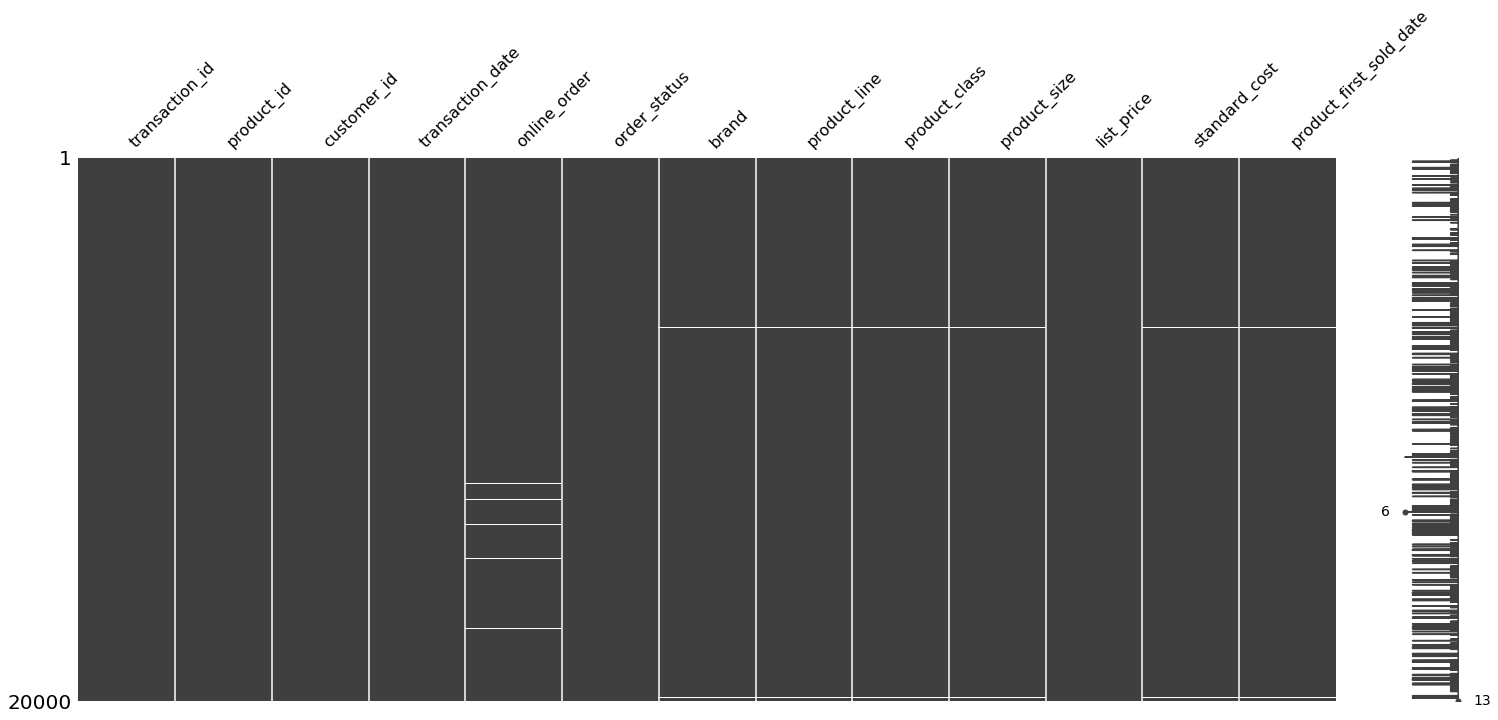

In [79]:
mn.matrix(df_transaction)

In [80]:
df_transaction.shape

(20000, 13)

In [81]:
df_transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [82]:
# filling missing value with 1.0 value

df_transaction['online_order'].fillna(value=1.0, inplace=True)

In [83]:
# drop all the rows with missing value

df_transaction.dropna(inplace=True)
df_transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [84]:
# to check for duplicates

duplicate_data = df_transaction.duplicated()
df_transaction[duplicate_data].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [85]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

**We can see here the product first sold date is not in datetime format, so we will correct it**

In [86]:
df_transaction['product_first_sold_date'] = pd.to_datetime(df_transaction['product_first_sold_date']).dt.date

In [87]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [88]:
# now we'll calculate the profit margin and add a new column with values

df_transaction['Profit Margin'] = df_transaction['list_price'] - df_transaction['standard_cost']
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit Margin
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01,1055.82


In [89]:
df_transaction.to_csv('Data/Customer_Transaction.csv')

# Merging new dataframe with transaction dataframe

In [90]:
df_demoaddtrans = new_df.merge(df_transaction, on = 'customer_id')

In [91]:
df_demoaddtrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18705 entries, 0 to 18704
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          18705 non-null  int64         
 1   gender                               18705 non-null  object        
 2   past_3_years_bike_related_purchases  18705 non-null  int64         
 3   job_title                            18705 non-null  object        
 4   job_industry_category                18705 non-null  object        
 5   wealth_segment                       18705 non-null  object        
 6   owns_car                             18705 non-null  object        
 7   name                                 18705 non-null  object        
 8   age                                  18705 non-null  int64         
 9   age_range                            18705 non-null  category      
 10  address   

**As we can see all three files has been cleaned and merged and ready to do analysis.<br>
We'll save merged file to keep the data safe**

In [92]:
df_demoaddtrans.to_csv('Data/CustomerDemoAddTrans.csv')

[Analysis notebook](http://localhost:8889/notebooks/REDI/Project/ReDI%20Project-%20Customer%20data%20analysis%20-%20Analytical%20part.ipynb)